
Creating network of 1 cell populations on 1 hosts...
  Number of cells on node 0: 200 
  Done; cell creation time = 0.01 s.
Making connections...
  Number of connections on node 0: 1599 
  Done; cell connection time = 0.07 s.
Adding stims...
  Number of stims on node 0: 200 
  Done; cell stims creation time = 0.01 s.
Recording 201 traces of 2 types on node 0

Running simulation for 1000.0 ms...
  Done; run time = 3.84 s; real-time ratio: 0.26.

Gathering data...
  Done; gather time = 0.06 s.

Analyzing...
  Cells: 200
  Connections: 1799 (8.99 per cell)
  Spikes: 2052 (10.26 Hz)
  Simulated time: 1.0 s; 1 workers
  Run time: 3.84 s
  Done; saving time = 0.00 s.
Plotting raster...


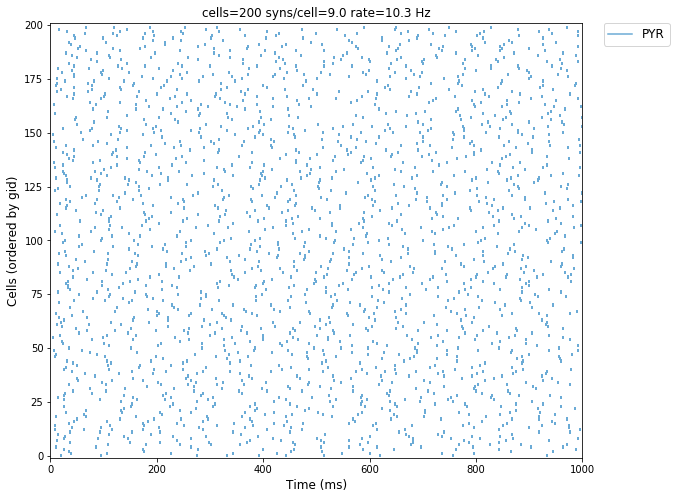

Plotting recorded cell traces ...


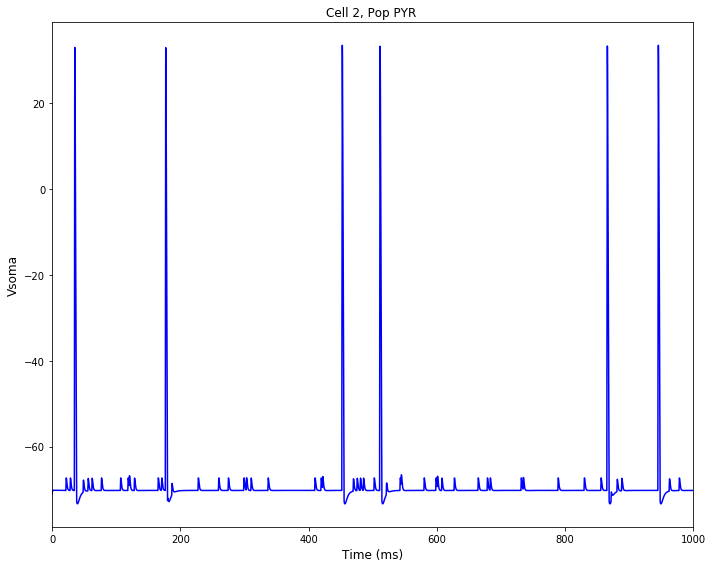

Plotting 2D representation of network cell locations and connections...


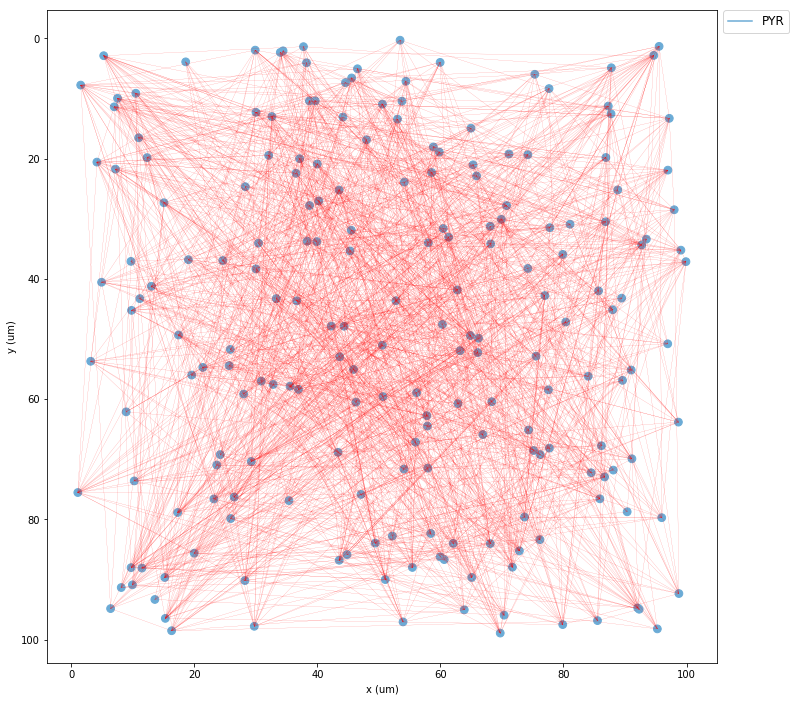

  Done; plotting time = 2.83 s

Total time = 6.82 s


In [3]:
"""
params.py 

netParams is a dict containing a set of network parameters using a standardized structure

simConfig is a dict containing a set of simulation configurations using a standardized structure

Contributors: salvadordura@gmail.com
"""

from netpyne import specs

netParams = specs.NetParams()   # object of class NetParams to store the network parameters
simConfig = specs.SimConfig()   # object of class SimConfig to store the simulation configuration


###############################################################################
#
# MPI HH TUTORIAL PARAMS
#
###############################################################################

###############################################################################
# NETWORK PARAMETERS
###############################################################################

# Population parameters
netParams.popParams['PYR'] = {'cellModel': 'HH', 'cellType': 'PYR', 'numCells': 200} # add dict with params for this pop 


# Cell parameters
## PYR cell properties
cellRule = {'conds': {'cellModel': 'HH', 'cellType': 'PYR'},  'secs': {}} 	# cell rule dict
cellRule['secs']['soma'] = {'geom': {}, 'mechs': {}}  														# soma params dict
cellRule['secs']['soma']['geom'] = {'diam': 18.8, 'L': 18.8, 'Ra': 123.0}  									# soma geometry
cellRule['secs']['soma']['mechs']['hh'] = {'gnabar': 0.12, 'gkbar': 0.036, 'gl': 0.003, 'el': -70}  		# soma hh mechanism
cellRule['secs']['soma']['vinit'] = -71
netParams.cellParams['PYR'] = cellRule  												# add dict to list of cell params

# Synaptic mechanism parameters
netParams.synMechParams['AMPA'] = {'mod': 'Exp2Syn', 'tau1': 0.1, 'tau2': 1.0, 'e': 0}


# Stimulation parameters
netParams.stimSourceParams['bkg'] = {'type': 'NetStim', 'rate': 10, 'noise': 0.5, 'start': 1}
netParams.stimTargetParams['bkg->PYR1'] = {'source': 'bkg', 'conds': {'pop': 'PYR'}, 'weight': 0.1, 'delay': 'uniform(1,5)'}


# Connectivity parameters
netParams.connParams['PYR->PYR'] = {
    'preConds': {'pop': 'PYR'}, 'postConds': {'pop': 'PYR'},
    'weight': 0.002,                    # weight of each connection
    'delay': '0.2+normal(13.0,1.4)',     # delay min=0.2, mean=13.0, var = 1.4
    'threshold': 10,                    # threshold
    'convergence': 'uniform(1,15)'}    # convergence (num presyn targeting postsyn) is uniformly distributed between 1 and 15


###############################################################################
# SIMULATION PARAMETERS
###############################################################################

# Simulation parameters
simConfig.duration = 1*1e3 # Duration of the simulation, in ms
simConfig.dt = 0.025 # Internal integration timestep to use
simConfig.seeds = {'conn': 1, 'stim': 1, 'loc': 1} # Seeds for randomizers (connectivity, input stimulation and cell locations)
simConfig.createNEURONObj = 1  # create HOC objects when instantiating network
simConfig.createPyStruct = 1  # create Python structure (simulator-independent) when instantiating network
simConfig.verbose = False  # show detailed messages 

# Recording 
simConfig.recordCells = []  # which cells to record from
simConfig.recordTraces = {'Vsoma':{'sec':'soma','loc':0.5,'var':'v'}}
simConfig.recordStim = True  # record spikes of cell stims
simConfig.recordStep = 0.1 # Step size in ms to save data (eg. V traces, LFP, etc)

# Saving
simConfig.filename = 'HHTut'  # Set file output name
simConfig.saveFileStep = 1000 # step size in ms to save data to disk
simConfig.savePickle = False # Whether or not to write spikes etc. to a .mat file

# Analysis and plotting 
simConfig.analysis['plotRaster'] = True  # Plot raster
simConfig.analysis['plotTraces'] = {'include': [2]}  # Plot raster
simConfig.analysis['plot2Dnet'] = True  # Plot 2D net cells and connections


from netpyne import sim
sim.createSimulateAnalyze(netParams = netParams, simConfig = simConfig)    
   
# import pylab; 


Creating network of 1 cell populations on 1 hosts...
  Number of cells on node 0: 200 
  Done; cell creation time = 0.01 s.
Making connections...
  Number of connections on node 0: 1599 
  Done; cell connection time = 0.07 s.
Adding stims...
  Number of stims on node 0: 200 
  Done; cell stims creation time = 0.01 s.
Recording 201 traces of 2 types on node 0

Running simulation for 1000.0 ms...
  Done; run time = 3.88 s; real-time ratio: 0.26.

Gathering data...
  Done; gather time = 0.06 s.

Analyzing...
  Cells: 200
  Connections: 1799 (8.99 per cell)
  Spikes: 20000 (100.00 Hz)
  Simulated time: 1.0 s; 1 workers
  Run time: 3.88 s
  Done; saving time = 0.00 s.
Plotting raster...


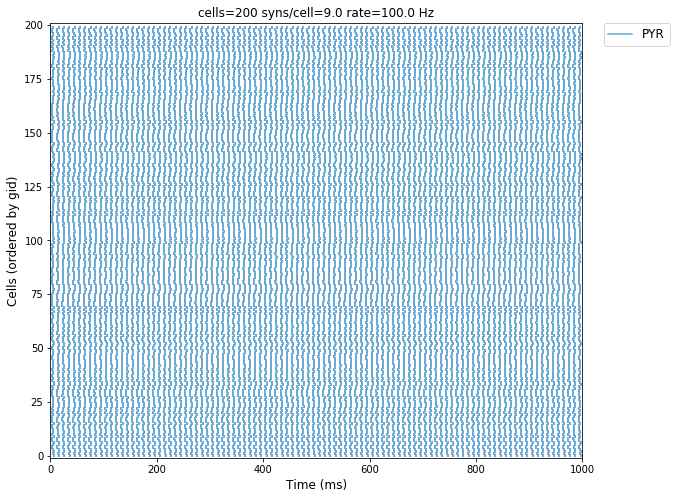

Plotting recorded cell traces ...


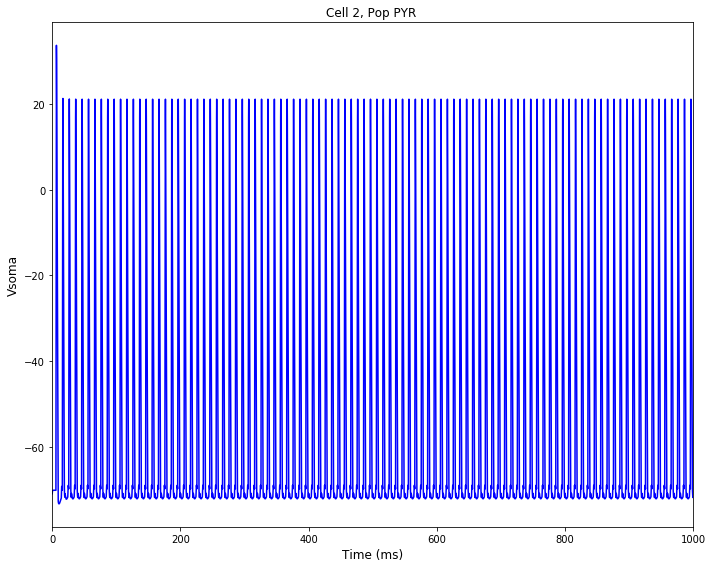

Plotting 2D representation of network cell locations and connections...


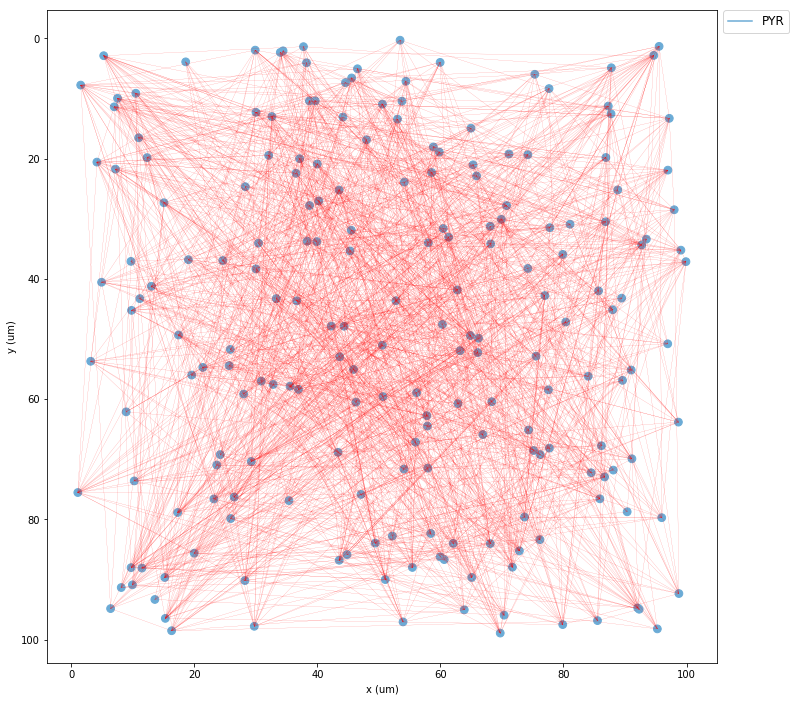

  Done; plotting time = 3.31 s

Total time = 7.35 s


In [6]:
"""
params.py 

netParams is a dict containing a set of network parameters using a standardized structure

simConfig is a dict containing a set of simulation configurations using a standardized structure

Contributors: salvadordura@gmail.com
"""

from netpyne import specs

netParams = specs.NetParams()   # object of class NetParams to store the network parameters
simConfig = specs.SimConfig()   # object of class SimConfig to store the simulation configuration


###############################################################################
#
# MPI HH TUTORIAL PARAMS
#
###############################################################################

###############################################################################
# NETWORK PARAMETERS
###############################################################################

# Population parameters
netParams.popParams['PYR'] = {'cellModel': 'HH', 'cellType': 'PYR', 'numCells': 200} # add dict with params for this pop 


# Cell parameters
## PYR cell properties
cellRule = {'conds': {'cellModel': 'HH', 'cellType': 'PYR'},  'secs': {}} 	# cell rule dict
cellRule['secs']['soma'] = {'geom': {}, 'mechs': {}}  														# soma params dict
cellRule['secs']['soma']['geom'] = {'diam': 18.8, 'L': 18.8, 'Ra': 123.0}  									# soma geometry
cellRule['secs']['soma']['mechs']['hh'] = {'gnabar': 0.12, 'gkbar': 0.036, 'gl': 0.003, 'el': -70}  		# soma hh mechanism
cellRule['secs']['soma']['vinit'] = -71
netParams.cellParams['PYR'] = cellRule  												# add dict to list of cell params

# Synaptic mechanism parameters
netParams.synMechParams['AMPA'] = {'mod': 'Exp2Syn', 'tau1': 0.1, 'tau2': 1.0, 'e': 0}


# Stimulation parameters
netParams.stimSourceParams['bkg'] = {'type': 'NetStim', 'rate': 100, 'noise': 0, 'start': 1}
netParams.stimTargetParams['bkg->PYR1'] = {'source': 'bkg', 'conds': {'pop': 'PYR'}, 'weight': 0.1, 'delay': 'uniform(1,5)'}


# Connectivity parameters
netParams.connParams['PYR->PYR'] = {
    'preConds': {'pop': 'PYR'}, 'postConds': {'pop': 'PYR'},
    'weight': 0.002,                    # weight of each connection
    'delay': '0.2+normal(13.0,1.4)',     # delay min=0.2, mean=13.0, var = 1.4
    'threshold': 10,                    # threshold
    'convergence': 'uniform(1,15)'}    # convergence (num presyn targeting postsyn) is uniformly distributed between 1 and 15


###############################################################################
# SIMULATION PARAMETERS
###############################################################################

# Simulation parameters
simConfig.duration = 1*1e3 # Duration of the simulation, in ms
simConfig.dt = 0.025 # Internal integration timestep to use
simConfig.seeds = {'conn': 1, 'stim': 1, 'loc': 1} # Seeds for randomizers (connectivity, input stimulation and cell locations)
simConfig.createNEURONObj = 1  # create HOC objects when instantiating network
simConfig.createPyStruct = 1  # create Python structure (simulator-independent) when instantiating network
simConfig.verbose = False  # show detailed messages 

# Recording 
simConfig.recordCells = []  # which cells to record from
simConfig.recordTraces = {'Vsoma':{'sec':'soma','loc':0.5,'var':'v'}}
simConfig.recordStim = True  # record spikes of cell stims
simConfig.recordStep = 0.1 # Step size in ms to save data (eg. V traces, LFP, etc)

# Saving
simConfig.filename = 'HHTut'  # Set file output name
simConfig.saveFileStep = 1000 # step size in ms to save data to disk
simConfig.savePickle = False # Whether or not to write spikes etc. to a .mat file

# Analysis and plotting 
simConfig.analysis['plotRaster'] = True  # Plot raster
simConfig.analysis['plotTraces'] = {'include': [2]}  # Plot raster
simConfig.analysis['plot2Dnet'] = True  # Plot 2D net cells and connections


from netpyne import sim
sim.createSimulateAnalyze(netParams = netParams, simConfig = simConfig)    
   
# import pylab; 